<a href="https://colab.research.google.com/github/Felipecl22/Portafolio-de-Ciencia-de-Datos/blob/nueva-rama/Estad%C3%ADstica_Descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Análisis exploratorio inicial:**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df_penguins = sns.load_dataset('penguins')

In [ ]:
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df_penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

La data contiene NA's.

Quitamos los NA's y usamos inplace = True para modificar automáticamente la df.

In [ ]:
df_penguins.dropna(inplace=True)

Volvemos a verificar la df por datos NA's.

In [ ]:
df_penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Variables categóricas.

In [ ]:
categoricas = []

for variables in df_penguins.columns:
  if df_penguins[variables].dtype == 'O':
    categoricas.append(variables)

print(categoricas)

['species', 'island', 'sex']


In [ ]:
print(df_penguins['species'].unique())
print(df_penguins['island'].unique())
print(df_penguins['sex'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['Male' 'Female']


In [ ]:
for t in ['species','island','sex']:
  valores_unicos = df_penguins[t].unique()
  print("Valores únicos de la columna", t, ":", valores_unicos)

Valores únicos de la columna species : ['Adelie' 'Chinstrap' 'Gentoo']
Valores únicos de la columna island : ['Torgersen' 'Biscoe' 'Dream']
Valores únicos de la columna sex : ['Male' 'Female']


Variables númericas.

In [ ]:
numericas = []

for variables in df_penguins.columns:
  if df_penguins[variables].dtype != 'O':
    numericas.append(variables)

print(numericas)

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


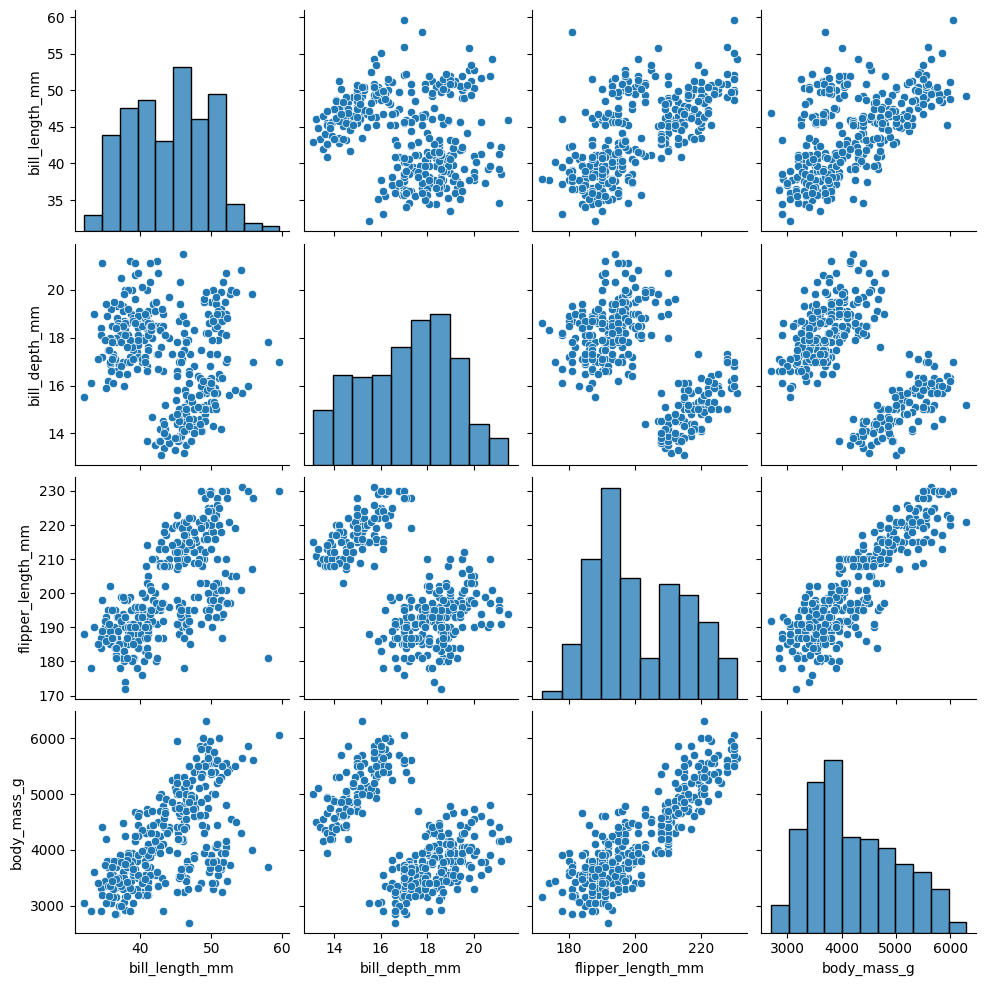

In [ ]:
sns.pairplot(df_penguins)
plt.show()

La data cuando la misma variable esta presente en los ejes X e Y, muestra la distribución univariada de la variable en cuestión.

La data cuando 2 variables esta graficadas muestra la relación entre ellas.

# **2. Resumen de estadísticas básicas:**

**Medidas de posicionamiento:**

In [ ]:
print(np.mean(df_penguins['bill_depth_mm']))
print(df_penguins['bill_depth_mm'].mean())

17.164864864864864
17.164864864864864


In [ ]:
medias = list(map(lambda columna: np.mean(df_penguins[columna]), numericas))

# Imprimir los nombres de las variables junto con sus medias correspondientes
for nombre_variable, media in zip(numericas, medias):
    print(f"Media de '{nombre_variable}': {media}")

Media de 'bill_length_mm': 43.99279279279279
Media de 'bill_depth_mm': 17.164864864864864
Media de 'flipper_length_mm': 200.96696696696696
Media de 'body_mass_g': 4207.057057057057


Cuando se usa la función map(), el primer argumento es una función que se aplicará a cada elemento del iterable pasado como segundo argumento. En este caso, el iterable es 'numericas'.

List  solo crea una lista.

In [ ]:
# Calcular estadísticas básicas para cada columna numérica
for columna in numericas:
    datos = df_penguins[columna]
    media = np.mean(datos)
    mediana = np.median(datos)
    desviacion_estandar = np.std(datos)
    minimo = np.min(datos)
    maximo = np.max(datos)

    # Imprimir estadísticas básicas
    print(f"Estadísticas para la variable '{columna}':")
    print(f"  Media: {media}")
    print(f"  Mediana: {mediana}")
    print(f"  Desviación estándar: {desviacion_estandar}")
    print(f"  Mínimo: {minimo}")
    print(f"  Máximo: {maximo}")
    print()

Estadísticas para la variable 'bill_length_mm':
  Media: 43.99279279279279
  Mediana: 44.5
  Desviación estándar: 5.460450955071463
  Mínimo: 32.1
  Máximo: 59.6

Estadísticas para la variable 'bill_depth_mm':
  Media: 17.164864864864864
  Mediana: 17.3
  Desviación estándar: 1.9662764301482418
  Mínimo: 13.1
  Máximo: 21.5

Estadísticas para la variable 'flipper_length_mm':
  Media: 200.96696696696696
  Mediana: 197.0
  Desviación estándar: 13.994704772576716
  Mínimo: 172.0
  Máximo: 231.0

Estadísticas para la variable 'body_mass_g':
  Media: 4207.057057057057
  Mediana: 4050.0
  Desviación estándar: 804.005860159563
  Mínimo: 2700.0
  Máximo: 6300.0



Iterando sobre cada nombre de columna en la lista numericas, y luego seleccionando los datos de esa columna específica del DataFrame utilizando df_penguins[columna]. Esto te permite calcular las estadísticas para cada variable numérica en tu conjunto de datos de penguins.

**Estadísticas para la variable 'bill_length_mm':**

1. Media: La longitud promedio del pico de los pingüinos es aproximadamente 44 mm.
2. Mediana: El valor medio de la longitud del pico es 44.5 mm. Esto significa que la mitad de los pingüinos tienen una longitud de pico menor o igual a 44.5 mm y la otra mitad tienen una longitud de pico mayor o igual a 44.5 mm.
3. Desviación estándar: La longitud del pico de los pingüinos tiende a variar alrededor de 5.46 mm de la media. Esto indica cuánto se dispersan los valores de la longitud del pico alrededor de la media, hacia arriba y abajo de la media.
4. Mínimo y Máximo: La longitud mínima del pico de los pingüinos es de 32.1 mm y la máxima es de 59.6 mm.

**Estadísticas para la variable 'bill_depth_mm':**

1. Media: La profundidad promedio del pico de los pingüinos es de aproximadamente 17.16 mm.
2. Mediana: El valor medio de la profundidad del pico es 17.3 mm. Esto significa que la mitad de los pingüinos tienen una profundidad de pico menor o igual a 17.3 mm y la otra mitad tienen una profundidad de pico mayor o igual a 17.3 mm.
3. Desviación estándar: La profundidad del pico de los pingüinos tiende a variar alrededor de 1.97 mm de la media, hacia arriba y abajo de la media.
4. Mínimo y Máximo: La profundidad mínima del pico de los pingüinos es de 13.1 mm y la máxima es de 21.5 mm.

**Estadísticas para la variable 'flipper_length_mm':**

1. Media: La longitud promedio de las aletas de los pingüinos es de aproximadamente 201 mm.
2. Mediana: El valor medio de la longitud de la aleta es 197 mm.
3. Desviación estándar: La longitud de la aleta de los pingüinos tiende a variar alrededor de 14 mm de la media, hacia arriba y abajo de la media.
4. Mínimo y Máximo: La longitud mínima de la aleta de los pingüinos es de 172 mm y la máxima es de 231 mm.

**Estadísticas para la variable 'body_mass_g':**

1. Media: El peso promedio de los pingüinos es de aproximadamente 4207 gramos.
2. Mediana: El valor medio del peso corporal es de 4050 gramos.
3. Desviación estándar: El peso corporal de los pingüinos tiende a variar alrededor de 804 gramos de la media, hacia arriba y abajo de la media.
4. Mínimo y Máximo: El peso corporal mínimo de los pingüinos es de 2700 gramos y el máximo es de 6300 gramos.

**Medidas de dispersión:**

In [ ]:
for columna in numericas: # numericas sólo tiene los nombres de las columnas, por ello necesitamos usar estas columnas pero con la data real.
    datos = df_penguins[columna] # Extraer los datos según las columnas seleccionadas en numericas.
    # Rango
    rango = np.max(datos) - np.min(datos)

    # Rango intercuartílico (IQR)
    Q1 = np.percentile(datos, 25)
    Q3 = np.percentile(datos, 75)
    iqr = Q3 - Q1

    # Varianza
    varianza = np.var(datos)

    # Coeficiente de variación
    coef_variacion = (np.std(datos) / np.mean(datos)) * 100

    # Imprimir estadísticas
    print(f"Estadísticas para la variable '{columna}':")
    print(f"  Rango: {rango}")
    print(f"  Rango Intercuartílico (IQR): {iqr}")
    print(f"  Varianza: {varianza}")
    print(f"  Coeficiente de Variación: {coef_variacion}")
    print()

Estadísticas para la variable 'bill_length_mm':
  Rango: 27.5
  Rango Intercuartílico (IQR): 9.100000000000001
  Varianza: 29.816524632740844
  Coeficiente de Variación: 12.412148919006642

Estadísticas para la variable 'bill_depth_mm':
  Rango: 8.4
  Rango Intercuartílico (IQR): 3.0999999999999996
  Varianza: 3.8662429997565133
  Coeficiente de Variación: 11.455239791447797

Estadísticas para la variable 'flipper_length_mm':
  Rango: 59.0
  Rango Intercuartílico (IQR): 23.0
  Varianza: 195.8517616715815
  Coeficiente de Variación: 6.9636841237082665

Estadísticas para la variable 'body_mass_g':
  Rango: 3600.0
  Rango Intercuartílico (IQR): 1225.0
  Varianza: 646425.4231709187
  Coeficiente de Variación: 19.11088557287087



**Variable 'bill_length_mm':**

1. Rango: La longitud del pico de los pingüinos varía en 27.5 mm desde el valor mínimo hasta el valor máximo.
2. Rango Intercuartílico (IQR): El intervalo entre el primer cuartil (25%) y el tercer cuartil (75%) de la longitud del pico es de aproximadamente 9.1 mm. Esto significa que el 50% central de los datos de la longitud del pico se encuentra en este rango.
3. Varianza: La longitud del pico de los pingüinos varía en promedio alrededor de 29.82 mm^2 desde la media.
4. Coeficiente de Variación: La variabilidad relativa de la longitud del pico en relación con su media es del 12.41%.

**Variable 'bill_depth_mm':**


1.   Rango: La profundidad del pico de los pingüinos varía en 8.4 mm desde el valor mínimo hasta el valor máximo.
2.   Rango Intercuartílico (IQR): El intervalo entre el primer cuartil (25%) y el tercer cuartil (75%) de la profundidad del pico es de aproximadamente 3.1 mm.
3.   Varianza: La profundidad del pico de los pingüinos varía en promedio alrededor de 3.87 mm^2 desde la media.
4.   Coeficiente de Variación: La variabilidad relativa de la profundidad del pico en relación con su media es del 11.46%.

**Variable 'flipper_length_mm':**

1. Rango: La longitud de las aletas de los pingüinos varía en 59.0 mm desde el valor mínimo hasta el valor máximo.
2. Rango Intercuartílico (IQR): El intervalo entre el primer cuartil (25%) y el tercer cuartil (75%) de la longitud de las aletas es de aproximadamente 23.0 mm.
3. Varianza: La longitud de las aletas de los pingüinos varía en promedio alrededor de 195.85 mm^2 desde la media.
4. Coeficiente de Variación: La variabilidad relativa de la longitud de las aletas en relación con su media es del 6.96%.

**Variable 'body_mass_g':**

1. Rango: El peso corporal de los pingüinos varía en 3600.0 gramos desde el valor mínimo hasta el valor máximo.
2. Rango Intercuartílico (IQR): El intervalo entre el primer cuartil (25%) y el tercer cuartil (75%) del peso corporal es de aproximadamente 1225.0 gramos.
3. Varianza: El peso corporal de los pingüinos varía en promedio alrededor de 646425.42 gramos^2 desde la media.
4. Coeficiente de Variación: La variabilidad relativa del peso corporal en relación con su media es del 19.11%.

**Varianza:**

La varianza es una medida de qué tan dispersos están los valores de una variable alrededor de su media. En este contexto, significa que la longitud del pico de los pingüinos tiende a variar, en promedio, alrededor de 29.82 mm^2 desde su valor promedio.

**Coeficiente de Variación:**

Es una medida de cuánto varían los datos en relación con su media. Si el coeficiente de variación es alto, significa que los datos están muy dispersos en relación con su media; si es bajo, significa que los datos están más agrupados alrededor de la media. En este caso, el coeficiente de variación del 12.41% para la longitud del pico de los pingüinos indica que la variabilidad de la longitud del pico es moderada en relación con su media.

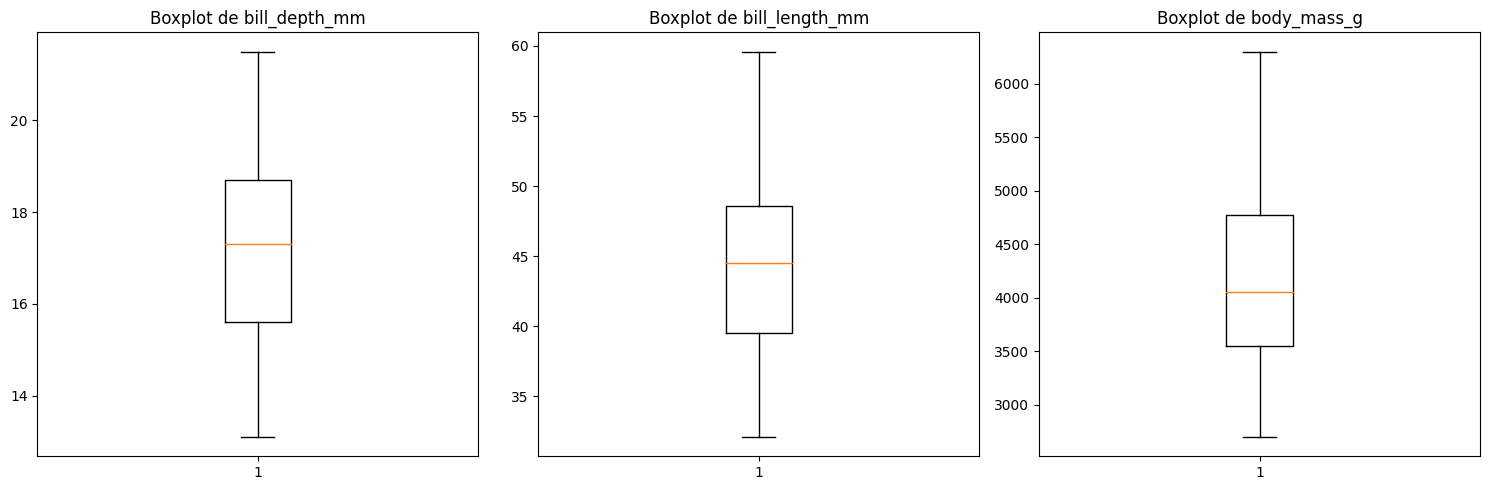

In [ ]:
bill_depth = df_penguins['bill_depth_mm']
bill_length = df_penguins['bill_length_mm']
body_mass = df_penguins['body_mass_g']

# Configurar el tamaño del lienzo y los ejes
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) # ncols=3 significa que estamos creando un total de 3 gráficos en nuestro lienzo.

# Graficar un boxplot para cada variable en su respectivo eje
ax[0].boxplot(bill_depth)
ax[0].set_title('Boxplot de bill_depth_mm')

ax[1].boxplot(bill_length)
ax[1].set_title('Boxplot de bill_length_mm')

ax[2].boxplot(body_mass)
ax[2].set_title('Boxplot de body_mass_g')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
df_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


# **3. Correlación entre variables**

In [ ]:
var_estudio = df_penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

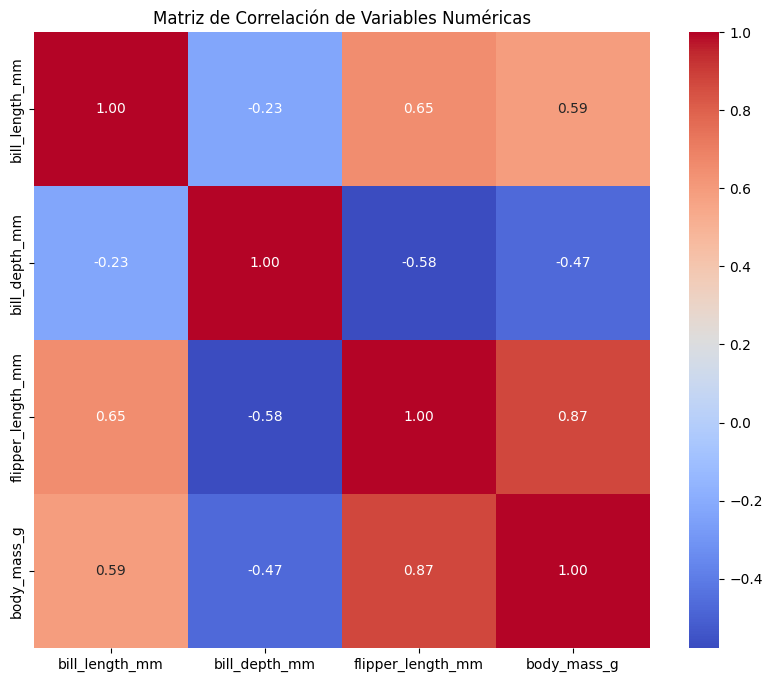

In [ ]:
# Calcular la matriz de correlación
correlacion = var_estudio.corr()

# Configurar el tamaño del lienzo
plt.figure(figsize=(10, 8))

# Visualizar la matriz de correlación como un mapa de calor
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Agregar título
plt.title('Matriz de Correlación de Variables Numéricas')

# Mostrar el gráfico
plt.show()


El código arriba se utiliza directamente en las columnas numéricas del DataFrame, y se calcula automáticamente el coeficiente de correlación de Pearson como método predeterminado

In [ ]:
# Calcular el coeficiente de correlación de Pearson
correlacion_pearson = var_estudio.corr(method='pearson')

# Calcular el coeficiente de correlación de Spearman
correlacion_spearman = var_estudio.corr(method='spearman')

# Mostrar los resultados
print("Coeficiente de correlación de Pearson:")
print(correlacion_pearson)

print("\nCoeficiente de correlación de Spearman:")
print(correlacion_spearman)

Coeficiente de correlación de Pearson:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  

Coeficiente de correlación de Spearman:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.213859           0.669754   
bill_depth_mm           -0.213859       1.000000          -0.517317   
flipper_length_mm        0.669754      -0.517317           1.000000   
body_mass_g              0.576480      -0.429283           0.840390   

                   body_mass_g  
bill_lengt

El coeficiente de correlación de Pearson y el coeficiente de correlación de Spearman son dos medidas de asociación entre variables que tienen algunas diferencias importantes:

**Pearson:**

Mide la fuerza y la dirección de la relación lineal entre dos variables continuas.
Requiere que las variables estén distribuidas de manera normal o se distribuyan de manera aproximada para ser efectivo.
Es sensible a relaciones lineales entre variables, pero puede no capturar relaciones no lineales.
Es más afectado por valores atípicos en los datos.
Puede variar entre -1 y 1, donde:
1 indica una correlación positiva perfecta,
-1 indica una correlación negativa perfecta, y
0 indica falta de correlación lineal.

**Spearman:**

Mide la relación monotónica entre dos variables, es decir, si cuando una variable aumenta, la otra también lo hace (o disminuye).
No requiere que las variables sigan una distribución normal y es más robusto a distribuciones no lineales y a la presencia de valores atípicos.
Es adecuado para datos ordinales o no distribuidos de manera normal.
Transforma los datos en rangos antes de calcular la correlación, por lo que no se ve afectado por la escala de las variables.
También puede variar entre -1 y 1, y los mismos valores de interpretación que el coeficiente de Pearson se aplican aquí.
En resumen, mientras que Pearson es más adecuado para identificar relaciones lineales entre variables continuas, Spearman es más útil cuando no se pueden asumir estas condiciones y se necesita una medida de asociación más general y robusta.

# **4. Grafico de variables categóricas:**

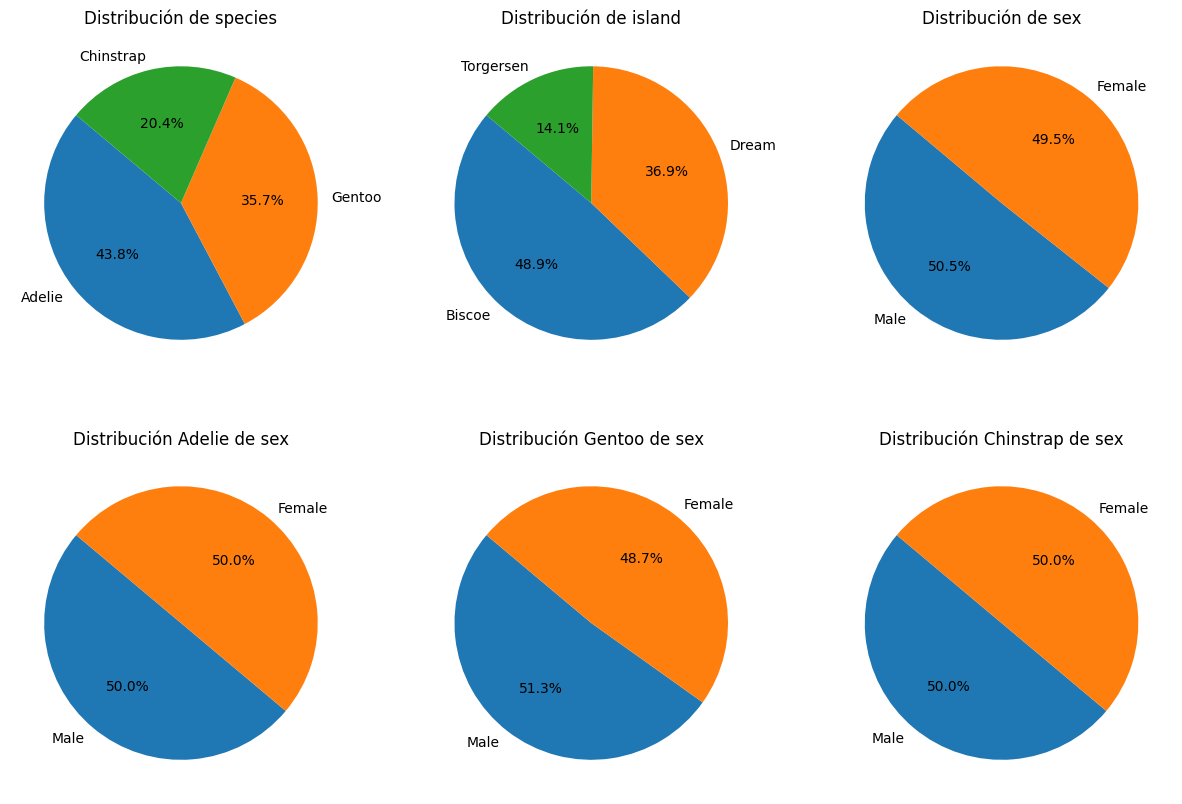

In [ ]:
# Configurar el tamaño del lienzo
plt.figure(figsize=(15, 10))

# Gráfico de pastel para la variable 'species'
plt.subplot(2, 3, 1) # plt.subplot() es una función muy útil en matplotlib para crear una cuadrícula de subgráficos dentro de un lienzo.
                     # plt.subplot(filas, columnas, indice)
                     # filas: El número de filas en el diseño del lienzo.
                     # columnas: El número de columnas en el diseño del lienzo.
                     # indice: El índice del subgráfico que se está creando, comenzando desde 1 en la esquina superior izquierda y aumentando hacia la derecha.
conteo_species = df_penguins['species'].value_counts()
plt.pie(conteo_species, labels=conteo_species.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de species')

# Gráfico de pastel para la variable 'island'
plt.subplot(2, 3, 2)
conteo_island = df_penguins['island'].value_counts()
plt.pie(conteo_island, labels=conteo_island.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de island')

# Gráfico de pastel para la variable 'sex'
plt.subplot(2, 3, 3)
conteo_sex = df_penguins['sex'].value_counts()
plt.pie(conteo_sex, labels=conteo_sex.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de sex')

# Filtrar filas donde 'sex' sea igual a cierto valor y 'species' sea igual a cierto valor
plt.subplot(2, 3, 4)
df_filtrado_Adelie = df_penguins[(df_penguins['species'] == 'Adelie')]
conteo_sex_Adelie = df_filtrado_Adelie['sex'].value_counts()
plt.pie(conteo_sex_Adelie, labels=conteo_sex.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución Adelie de sex')

# Filtrar filas donde 'sex' sea igual a cierto valor y 'species' sea igual a cierto valor
plt.subplot(2, 3, 5)
df_filtrado_Gentoo = df_penguins[(df_penguins['species'] == 'Gentoo')]
conteo_sex_Gentoo = df_filtrado_Gentoo['sex'].value_counts()
plt.pie(conteo_sex_Gentoo, labels=conteo_sex.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución Gentoo de sex')

# Filtrar filas donde 'sex' sea igual a cierto valor y 'species' sea igual a cierto valor
plt.subplot(2, 3, 6)
df_filtrado_Chinstrap = df_penguins[(df_penguins['species'] == 'Chinstrap')]
conteo_sex_Chinstrap = df_filtrado_Chinstrap['sex'].value_counts()
plt.pie(conteo_sex_Chinstrap, labels=conteo_sex.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución Chinstrap de sex')

# Mostrar el gráfico
plt.show()

Los dos primeros parámetros de plt.subplot() especifican el número de filas y columnas en el diseño del lienzo de subgráficos. Luego, el tercer parámetro indica la posición del subgráfico dentro de esa cuadrícula, numerando los subgráficos de izquierda a derecha y de arriba abajo, comenzando desde 1.

Entonces, si deseas un diseño de 2 filas y 3 columnas, puedes utilizar plt.subplot(2, 3, i) para iterar sobre los subgráficos de izquierda a derecha y de arriba abajo, donde i sería el número de subgráfico.

# **5. Anova**

In [ ]:
from scipy.stats import f_oneway

# Filtrar los datos por especie de pingüino
adelie = df_penguins[df_penguins['species'] == 'Adelie']['bill_length_mm']
chinstrap = df_penguins[df_penguins['species'] == 'Chinstrap']['bill_length_mm']
gentoo = df_penguins[df_penguins['species'] == 'Gentoo']['bill_length_mm']

# Realizar ANOVA
resultado_anova = f_oneway(adelie, chinstrap, gentoo)

# Imprimir el resultado
print("Resultado ANOVA:")
print("Estadística F:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)

Resultado ANOVA:
Estadística F: 397.29943741282835
Valor p: 1.3809842053150027e-88



El resultado del ANOVA indica que hay una diferencia significativa entre las medias de las longitudes de pico entre las diferentes especies de pingüinos. La estadística F es de 397.30 y el valor p es extremadamente pequeño (aproximadamente 1.38e-88), lo que sugiere que existe una diferencia significativa entre al menos dos de las medias poblacionales.

En resumen, basándonos en este análisis, podemos concluir que las longitudes de pico varían significativamente entre las especies de pingüinos.

**La ANOVA de dos factores, también conocida como ANOVA bifactorial, es una extensión del análisis de varianza que permite analizar cómo dos variables categóricas afectan a una variable numérica continua. Por ejemplo, podrías estar interesado en cómo la especie y el sexo de los pingüinos afectan a la longitud del pico.**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ajustar el modelo de ANOVA de dos factores
modelo_anova = ols('bill_length_mm ~ C(species) * C(sex)', data=df_penguins).fit()

# Realizar el análisis de varianza
tabla_anova = sm.stats.anova_lm(modelo_anova, typ=2)

# Imprimir la tabla de ANOVA
print(tabla_anova)


                        sum_sq     df           F         PR(>F)
C(species)         6975.591607    2.0  650.478579  1.059087e-114
C(sex)             1135.683888    1.0  211.806563   2.422971e-37
C(species):C(sex)    24.494427    2.0    2.284122   1.034865e-01
Residual           1753.338642  327.0         NaN            NaN


Basándonos en los resultados de la tabla ANOVA:

El factor de especie (C(species)) tiene un efecto significativo en la longitud del pico, con un valor F muy alto (650.48) y un valor p extremadamente pequeño (1.059087e-114), lo que indica diferencias significativas entre al menos dos especies de pingüinos en términos de longitud del pico.

El factor de sexo (C(sex)) también tiene un efecto significativo en la longitud del pico, con un valor F alto (211.81) y un valor p muy bajo (2.422971e-37), lo que sugiere diferencias significativas entre los sexos en términos de longitud del pico.

La interacción entre especie y sexo (C(species):C(sex)) no es significativa, ya que su valor p (0.1035) es mayor que el umbral de significancia típico de 0.05. Esto indica que la influencia de la especie en la longitud del pico no difiere significativamente entre los sexos, y viceversa.
El residual representa la variabilidad no explicada por el modelo y se utiliza para evaluar la bondad del ajuste del modelo.

sum_sq: Esta columna muestra la suma de cuadrados, que representa la cantidad total de variabilidad en la variable dependiente explicada por cada factor y su interacción, así como la variabilidad residual no explicada por el modelo.

df: Indica los grados de libertad asociados con cada factor y su interacción, así como los grados de libertad residuales. Los grados de libertad son una medida de la cantidad de variabilidad que puede variar libremente una vez que se han estimado ciertos parámetros.

F: El valor F es la relación entre la varianza entre los grupos y la varianza dentro de los grupos. Es una medida de la magnitud de la diferencia entre los grupos en comparación con la variabilidad dentro de los grupos. Valores más altos de F indican una mayor diferencia entre los grupos.

PR(>F): Esta columna proporciona el valor p asociado con cada efecto y su interacción. Indica la probabilidad de observar el efecto o una diferencia igualmente grande entre los grupos si la verdadera diferencia entre los grupos fuera cero. Un valor p bajo (<0.05) sugiere que el efecto es estadísticamente significativo.



**ANOVA de medidas repetidas (Repeated Measures ANOVA):**

In [ ]:
import numpy as np
import pandas as pd
import pingouin as pg

# Crear un DataFrame con mediciones repetidas ficticias
datos = {
    'Pingüino': np.repeat(range(1, 11), 3),  # 10 pingüinos, cada uno con 3 mediciones
    'Tiempo': np.tile(['T1', 'T2', 'T3'], 10),  # Tres momentos de medición repetidos
    'Longitud_Pico': np.random.normal(loc=40, scale=5, size=30)  # Valores ficticios de longitud del pico
}
df_medidas_repetidas = pd.DataFrame(datos)

# Realizar ANOVA de medidas repetidas con el factor 'Tiempo'
anova_rm = pg.rm_anova(data=df_medidas_repetidas, dv='Longitud_Pico', within='Tiempo', subject='Pingüino')
print(anova_rm)



   Source  ddof1  ddof2         F     p-unc       ng2      eps
0  Tiempo      2     18  0.318606  0.731179  0.019007  0.93595


La tabla de resultados proporcionada por ANOVA de medidas repetidas muestra las siguientes columnas:

Source: Indica el factor sobre el cual se realizó el análisis de varianza. En este caso, el factor es 'Tiempo', lo que significa que se evaluó la variabilidad de las mediciones a lo largo del tiempo.
ddof1: Grados de libertad del numerador. Representa el número de categorías del factor menos 1. En este caso, el factor 'Tiempo' tiene 3 niveles (T1, T2, T3), por lo que ddof1 es 2.
ddof2: Grados de libertad del denominador. Representa el número de sujetos menos 1 multiplicado por el número de niveles del factor menos 1. En este caso, hay 10 sujetos y 3 niveles del factor, por lo que ddof2 es 18.
F: Estadística F calculada para la prueba de ANOVA. Evalúa si hay diferencias significativas entre las medias de los grupos.
p-unc: Valor p obtenido para la prueba de ANOVA. Indica la probabilidad de observar los datos si la hipótesis nula (la ausencia de diferencias significativas entre las medias) fuera cierta. En este caso, el valor p es 0.689215, lo que sugiere que no hay diferencias significativas entre las medias de las mediciones a lo largo del tiempo.
ng2: Tamaño del efecto parcial. Representa la proporción de la varianza explicada por el factor 'Tiempo'. En este caso, el tamaño del efecto es pequeño (0.027167), lo que sugiere que el factor 'Tiempo' tiene un impacto limitado en las mediciones.
eps: Epsilon de Greenhouse-Geisser. Es un ajuste para el error de sphericity en el diseño experimental. Un valor de eps cercano a 1 indica que los datos cumplen con el supuesto de esfericidad. En este caso, eps es 0.890463, lo que sugiere que los datos están cerca de cumplir con este supuesto.


Según los resultados de la ANOVA de medidas repetidas:

No hay diferencias significativas entre las medias de las mediciones a lo largo del tiempo: El valor p obtenido (0.689215) es mayor que el nivel de significancia comúnmente utilizado (por ejemplo, α = 0.05), lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula. En otras palabras, no hay diferencias significativas en las mediciones de longitud del pico entre los diferentes momentos de tiempo evaluados.
Tamaño del efecto parcial pequeño: El tamaño del efecto parcial (ng2) es pequeño (0.027167), lo que sugiere que el factor 'Tiempo' tiene un impacto limitado en las mediciones. Esto indica que cualquier variabilidad observada en las mediciones a lo largo del tiempo es mínima en comparación con la variabilidad total.
Los datos están cerca de cumplir con el supuesto de esfericidad: El valor de epsilon de Greenhouse-Geisser (eps) es 0.890463, lo que sugiere que los datos están cerca de cumplir con el supuesto de esfericidad. Esto significa que la varianza de las diferencias entre todas las combinaciones de niveles del factor 'Tiempo' es similar. Sin embargo, este resultado debe interpretarse con precaución, ya que un eps cercano a 1 no garantiza completamente el cumplimiento del supuesto de esfericidad.
En resumen, basado en estos resultados, no hay evidencia suficiente para concluir que existen diferencias significativas en las mediciones de longitud del pico entre los diferentes momentos de tiempo evaluados.